***

<center><span style="font-size:40px; font-family:Arial; color:teal;">Weather-Related Disease Prediction Model</span></center>

***

<center><img src="C:\Users\Nymisha\OneDrive\Desktop\wether related disease.jpeg" alt="Description" width="400"/><center>


"**This image shows how different weather conditions like heat (sun), cold (snow), wind, and changing environments can directly impact human health.

 The image highlights the strong connection between weather patterns and various health issues affecting people.**"


***

<span style="font-size:40px; font-family:Times New Roman fount; color:Red;">Objective:</span>

The goal of this project is to predict the likelihood of a disease occurrence based on various weather conditions such as temperature, humidity, rainfall, and other meteorological factors.

***

<span style="font-size:40px; font-family:Times New Roman fount; color:purple;">Problem Statement:</span>

Weather patterns significantly impact public health, leading to outbreaks of diseases like dengue, malaria, and heatstroke. Early prediction based on weather data can help health organizations take preventive measures and reduce the impact on affected communities.



***

<center><span style="font-size:40px; font-family:Arial; color:blue;">Data Description</span></center>


***

<span style="font-size:40px; font-family:Times New Roman fount; color:green;">Data Source:</span>

"The dataset was synthetically generated for research and educational purposes, based on typical weather-disease patterns observed globally."

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df = pd.read_csv("Weather-related disease prediction.csv")

In [150]:
df

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826000,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628000,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800000,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254000,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162000,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,91,1,21.714000,0.870000,5.450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Arthritis
5196,83,0,10.491000,0.920000,9.165000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Stroke
5197,77,0,19.942824,0.744583,9.305129,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
5198,84,0,20.069000,0.850000,17.971000,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5200 non-null   int64  
 1   Gender                   5200 non-null   int64  
 2   Temperature (C)          5200 non-null   float64
 3   Humidity                 5200 non-null   float64
 4   Wind Speed (km/h)        5200 non-null   float64
 5   nausea                   5200 non-null   int64  
 6   joint_pain               5200 non-null   int64  
 7   abdominal_pain           5200 non-null   int64  
 8   high_fever               5200 non-null   int64  
 9   chills                   5200 non-null   int64  
 10  fatigue                  5200 non-null   int64  
 11  runny_nose               5200 non-null   int64  
 12  pain_behind_the_eyes     5200 non-null   int64  
 13  dizziness                5200 non-null   int64  
 14  headache                

In [154]:
df.head(6)

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis
5,100,1,27.842,0.980000,1.778000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Sinusitis


In [156]:
df.tail(6)

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
5194,71,1,37.380000,0.760000,20.440000,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Eczema
5195,91,1,21.714000,0.870000,5.450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Arthritis
5196,83,0,10.491000,0.920000,9.165000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Stroke
5197,77,0,19.942824,0.744583,9.305129,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
5198,84,0,20.069000,0.850000,17.971000,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
5199,100,1,38.021000,0.750000,18.300000,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,Eczema


In [158]:
df.isnull().sum()

Age                        0
Gender                     0
Temperature (C)            0
Humidity                   0
Wind Speed (km/h)          0
nausea                     0
joint_pain                 0
abdominal_pain             0
high_fever                 0
chills                     0
fatigue                    0
runny_nose                 0
pain_behind_the_eyes       0
dizziness                  0
headache                   0
chest_pain                 0
vomiting                   0
cough                      0
shivering                  0
asthma_history             0
high_cholesterol           0
diabetes                   0
obesity                    0
hiv_aids                   0
nasal_polyps               0
asthma                     0
high_blood_pressure        0
severe_headache            0
weakness                   0
trouble_seeing             0
fever                      0
body_aches                 0
sore_throat                0
sneezing                   0
diarrhea      

In [160]:
df.columns

Index(['Age', 'Gender', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills',
       'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness',
       'headache', 'chest_pain', 'vomiting', 'cough', 'shivering',
       'asthma_history', 'high_cholesterol', 'diabetes', 'obesity', 'hiv_aids',
       'nasal_polyps', 'asthma', 'high_blood_pressure', 'severe_headache',
       'weakness', 'trouble_seeing', 'fever', 'body_aches', 'sore_throat',
       'sneezing', 'diarrhea', 'rapid_breathing', 'rapid_heart_rate',
       'pain_behind_eyes', 'swollen_glands', 'rashes', 'sinus_headache',
       'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste',
       'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion',
       'back_pain', 'knee_ache', 'prognosis'],
      dtype='object')

In [162]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print("---------------------------------------------------------------")

Age
Age
59    85
55    84
56    83
58    76
74    73
      ..
91    28
93    28
99    27
96    24
94    23
Name: count, Length: 100, dtype: int64
---------------------------------------------------------------
Gender
Gender
1    2661
0    2539
Name: count, dtype: int64
---------------------------------------------------------------
Temperature (C)
Temperature (C)
2.995833     18
1.566667      9
30.531481     8
7.184491      8
17.642130     8
             ..
26.100000     1
10.566000     1
28.530000     1
12.877000     1
38.021000     1
Name: count, Length: 3434, dtype: int64
---------------------------------------------------------------
Humidity
Humidity
0.770000    89
0.590000    83
0.730000    79
0.760000    79
0.610000    75
            ..
0.468333     1
0.577500     1
0.951667     1
0.938333     1
0.537083     1
Name: count, Length: 482, dtype: int64
---------------------------------------------------------------
Wind Speed (km/h)
Wind Speed (km/h)
9.592917     12
10.209412     9


In [164]:
df.dtypes

Age                          int64
Gender                       int64
Temperature (C)            float64
Humidity                   float64
Wind Speed (km/h)          float64
nausea                       int64
joint_pain                   int64
abdominal_pain               int64
high_fever                   int64
chills                       int64
fatigue                      int64
runny_nose                   int64
pain_behind_the_eyes         int64
dizziness                    int64
headache                     int64
chest_pain                   int64
vomiting                     int64
cough                        int64
shivering                    int64
asthma_history               int64
high_cholesterol             int64
diabetes                     int64
obesity                      int64
hiv_aids                     int64
nasal_polyps                 int64
asthma                       int64
high_blood_pressure          int64
severe_headache              int64
weakness            

In [166]:
df.describe()

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,sinus_headache,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,...,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,51.383269,0.511731,19.943117,0.744873,10.708818,0.155385,0.065769,0.040000,0.101731,0.062885,...,0.030769,0.035192,0.032500,0.032692,0.033077,0.029615,0.037115,0.066346,0.035192,0.038077
std,26.625863,0.499910,11.414905,0.142860,5.686331,0.362306,0.247902,0.195978,0.302323,0.242779,...,0.172708,0.184283,0.177341,0.177847,0.178855,0.169540,0.189063,0.248910,0.184283,0.191400
min,1.000000,0.000000,-15.125000,0.370833,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,12.184500,0.624479,6.414508,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,1.000000,20.017500,0.750000,10.152500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,1.000000,28.465250,0.860000,15.061550,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,40.996000,1.000000,31.303096,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1) count:
   
       -> Tells how many non-missing (non-NaN) entries are present in each column.

            Example: If Temperature has a count of 1000, it means there are 1000 valid temperature records.
2) mean:

       -> Shows the average value of the column.

            Example: If Humidity has a mean of 75.2, on average, humidity was 75.2%.

3) std (Standard Deviation):

       -> Measures how spread out the values are.

          High std → values vary a lot from the mean.
   
          Low std → values are tightly packed near the mean.

4) min:

        -> Shows the smallest value in that column.

            Example: If Rainfall min is 0.0, it means at least one record had zero rainfall.

5) 25% (First Quartile / Q1):

       -> 25% of the data points are below this value.

       -> Helps understand the lower range of the data.

6) 50% (Median / Q2):

       -> The middle value when all data points are sorted.

       -> Half the data points are below and half are above this value.

7) 75% (Third Quartile / Q3):

       -> 75% of the data points are below this value.

       -> Shows the upper range of typical data points.

8) max:

         -> The largest value found in that column.

              Example: If Temperature max is 45°C, that's the highest temperature recorded.

In [169]:
df.duplicated().sum()

219

In [171]:
duplicates = df[df.duplicated()]

print(duplicates)

      Age  Gender  Temperature (C)  Humidity  Wind Speed (km/h)  nausea  \
111    58       0        11.966898  0.550833          23.919904       0   
659    50       1        34.182000  0.590000           1.833000       0   
783    65       0         0.800231  0.809167          11.181450       0   
819    59       1        40.074000  0.700000           1.296000       1   
864    49       1         1.566667  0.751250          15.409712       0   
...   ...     ...              ...       ...                ...     ...   
5112   32       0         9.680787  0.877500          14.917992       0   
5125   83       0         3.755787  0.733750          20.218917       0   
5184   48       0        39.704000  0.530000           8.904000       1   
5185   47       0        18.723843  0.837500           9.760625       0   
5198   84       0        20.069000  0.850000          17.971000       0   

      joint_pain  abdominal_pain  high_fever  chills  ...  facial_pain  \
111            0         

In [173]:
df = df.drop_duplicates()

In [175]:
df = df.reset_index(drop=True)

In [177]:
df

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826000,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628000,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800000,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254000,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162000,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,71,1,37.380000,0.760000,20.440000,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Eczema
4977,91,1,21.714000,0.870000,5.450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Arthritis
4978,83,0,10.491000,0.920000,9.165000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Stroke
4979,77,0,19.942824,0.744583,9.305129,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza


In [179]:
df["prognosis"].value_counts()

prognosis
Heart Attack    968
Migraine        897
Influenza       632
Heat Stroke     323
Malaria         319
Stroke          312
Eczema          311
Common Cold     309
Dengue          308
Sinusitis       301
Arthritis       301
Name: count, dtype: int64

this is Classification Problem

The model will predict one of several fixed classes (disease names), not a continuous numerical value.

***

<span style="font-size:40px; font-family:Times New Roman fount; color:orange;">DATA VOLUME:</span>

In [184]:
df.shape

(4981, 51)

In [186]:

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")


Dataset contains 4981 rows and 51 columns


     -> You have 4981 different patient records (after cleaning duplicates).

     -> Each patient record has 51 pieces of information

***

<span style="font-size:40px; font-family:Times New Roman fount; color:violet;">Key Variables:</span>

In [191]:
df.columns

Index(['Age', 'Gender', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills',
       'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness',
       'headache', 'chest_pain', 'vomiting', 'cough', 'shivering',
       'asthma_history', 'high_cholesterol', 'diabetes', 'obesity', 'hiv_aids',
       'nasal_polyps', 'asthma', 'high_blood_pressure', 'severe_headache',
       'weakness', 'trouble_seeing', 'fever', 'body_aches', 'sore_throat',
       'sneezing', 'diarrhea', 'rapid_breathing', 'rapid_heart_rate',
       'pain_behind_eyes', 'swollen_glands', 'rashes', 'sinus_headache',
       'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste',
       'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion',
       'back_pain', 'knee_ache', 'prognosis'],
      dtype='object')

Target Variable:-

          prognosis


Weather Factors:-

         Temperature (C),
         
         Humidity,
         
         Wind Speed (km/h)

Symptoms (Patient Condition):-

          fever,
          
          high_fever,
          
          cough, 
          
          sore_throat,
          
          chills,
          
          runny_nose,
          
          pain_behind_the_eyes,
          
          joint_pain, 
          
          headache, 
          
          vomiting,
          
          fatigue,
          
          weakness,
          
          rashes, 
          
          shortness_of_breath, 
          
          sneezing,
          
          abdominal_pain,
          
          diarrhea,
          
          confusion,
          
          throbbing_headache,
          
          sinus_headache, 
          
          back_pain,
          
          knee_ache,
          
          itchiness,
          
          skin_irritation,
          
          swollen_glands, 
          
          dizziness,
          
          reduced_smell_and_taste,
          
          facial_pain, 
          
          etc.

Medical History:-

         asthma,
         
         diabetes, 
         
         hiv_aids, 
         
         obesity,
         
         high_blood_pressure,
         
         high_cholesterol,
         
         asthma_history, 
         
         nasal_polyps

Demographics:-

          Age,
          
          Gender.



***

<span style="font-size:40px; font-family:Times New Roman fount; color:navy;">Data Cleaning:</span>

<span style="font-size:20px; font-family:Times New Roman fount; color:black;"> Drop Duplicate Records:</span>

In [197]:
df = df.drop_duplicates()

In [199]:
df = df.reset_index(drop=True)

In [86]:
df

,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,4,1,25.826000,0.740000,8.289000,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,55,0,21.628000,0.600000,15.236000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,45,0,13.800000,0.817083,4.291992,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,6,0,37.254000,0.610000,18.009000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,70,0,18.162000,0.870000,17.916000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,71,1,37.380000,0.760000,20.440000,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Eczema
4977,91,1,21.714000,0.870000,5.450000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,Arthritis
4978,83,0,10.491000,0.920000,9.165000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Stroke
4979,77,0,19.942824,0.744583,9.305129,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza


<span style="font-size:20px; font-family:Times New Roman fount; color:black;"> Handle Missing Values:</span>

df.isnull().sum()


In [91]:
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


In [93]:
df['Gender'].value_counts()


Gender
1    2556
0    2425
Name: count, dtype: int64

<span style="font-size:20px; font-family:Times New Roman fount; color:black;">Handle Data Types:</span>

In [97]:
df.dtypes


Age                          int64
Gender                       int64
Temperature (C)            float64
Humidity                   float64
Wind Speed (km/h)          float64
nausea                       int64
joint_pain                   int64
abdominal_pain               int64
high_fever                   int64
chills                       int64
fatigue                      int64
runny_nose                   int64
pain_behind_the_eyes         int64
dizziness                    int64
headache                     int64
chest_pain                   int64
vomiting                     int64
cough                        int64
shivering                    int64
asthma_history               int64
high_cholesterol             int64
diabetes                     int64
obesity                      int64
hiv_aids                     int64
nasal_polyps                 int64
asthma                       int64
high_blood_pressure          int64
severe_headache              int64
weakness            

In [99]:
df['Age'] = df['Age'].astype(int)


In [101]:
df.dtypes

Age                          int32
Gender                       int64
Temperature (C)            float64
Humidity                   float64
Wind Speed (km/h)          float64
nausea                       int64
joint_pain                   int64
abdominal_pain               int64
high_fever                   int64
chills                       int64
fatigue                      int64
runny_nose                   int64
pain_behind_the_eyes         int64
dizziness                    int64
headache                     int64
chest_pain                   int64
vomiting                     int64
cough                        int64
shivering                    int64
asthma_history               int64
high_cholesterol             int64
diabetes                     int64
obesity                      int64
hiv_aids                     int64
nasal_polyps                 int64
asthma                       int64
high_blood_pressure          int64
severe_headache              int64
weakness            

***

<center><span style="font-size:40px; font-family:Arial; color:cyan;"> EDA Analysis </span></center>


***

<span style="font-size:35px; font-family:Times New Roman fount; color:indigo;">countplot:</span>

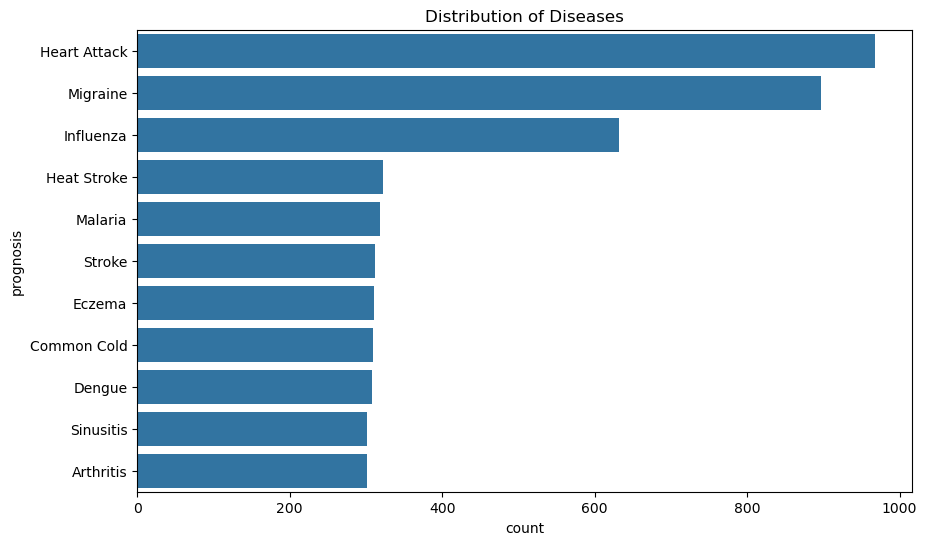

In [108]:
# Plot target distribution
plt.figure(figsize=(10,6))
sns.countplot(y='prognosis', data=df, order=df['prognosis'].value_counts().index)
plt.title('Distribution of Diseases')
plt.show()


"Here we have a horizontal bar plot showing the distribution of different diseases in our dataset.

The Y-axis lists the disease types, and the X-axis shows the number of cases for each disease.

As we can observe, 'Heart Attack' is the most common diagnosis, followed by 'Migraine' and 'Influenza'.

Diseases like 'Stroke', 'Sinusitis', and 'Arthritis' have relatively fewer records.

This plot helps us understand the imbalance in the dataset — some diseases are much more common than others.

Knowing this is important because it can affect the performance of our machine learning models —
for example, models may become biased towards predicting the more frequent diseases."

<span style="font-size:35px; font-family:Times New Roman fount; color:indigo;">Histplot :</span>

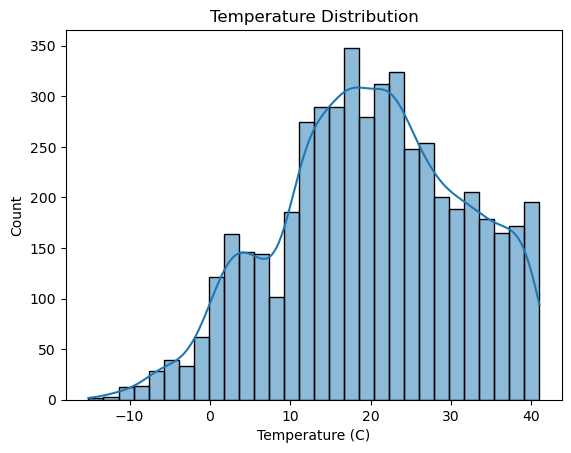

In [112]:
# Plot Temperature distribution
sns.histplot(df['Temperature (C)'], kde=True)
plt.title('Temperature Distribution')
plt.show()


"This graph shows the distribution of temperature values recorded for patients.

The X-axis represents the temperature in degrees Celsius, and the Y-axis represents the number of patients having that particular temperature range.

We also have a smooth density curve (KDE) that helps us understand where most of the temperature values are concentrated.

From the plot, we can observe that the majority of patients have temperatures clustered around the normal human body temperature range.

This type of analysis helps us identify any anomalies — such as extremely high or low temperatures — that could be important symptoms related to certain diseases."

<span style="font-size:35px; font-family:Times New Roman fount; color:indigo;">countplot:</span>

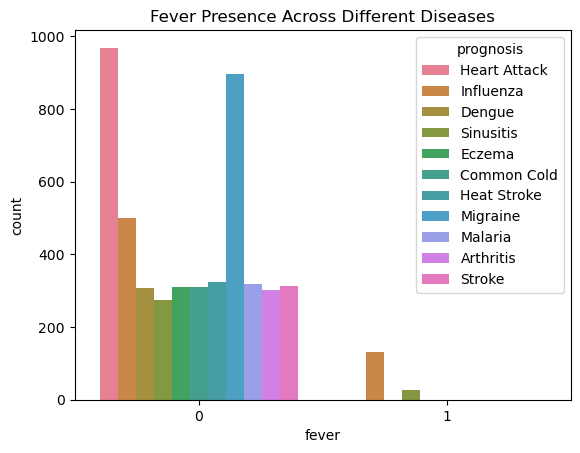

In [116]:
sns.countplot(x='fever', hue='prognosis', data=df)
plt.title('Fever Presence Across Different Diseases')
plt.show()


"This bar plot shows the relationship between fever presence and different diseases.

On the X-axis, we have two categories: patients without fever (0) and patients with fever (1).

The colored bars represent different diseases. Each segment of the bar shows the number of patients with a specific disease who either had fever or did not have fever.

From the plot, we can observe that diseases such as Influenza and Dengue are more commonly associated with the presence of fever, while diseases like Arthritis and Migraine show fewer cases of fever.

This insight is crucial because it helps us understand which symptoms are strong indicators for particular diseases, and improves feature importance for our machine learning model."

<span style="font-size:35px; font-family:Times New Roman fount; color:indigo;">Pie Chart:</span>

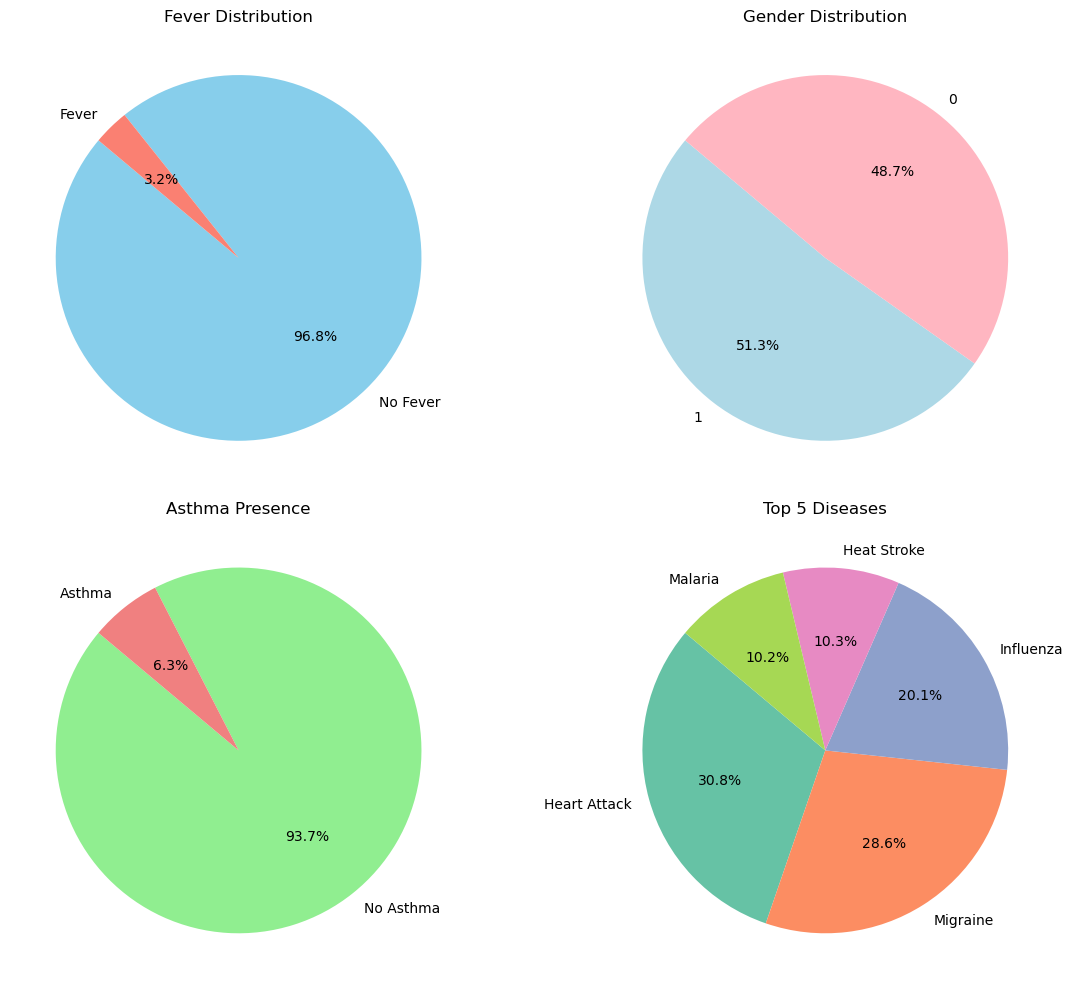

In [120]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Pie Chart 1: Fever
fever_counts = df['fever'].value_counts()
axes[0,0].pie(fever_counts, labels=['No Fever', 'Fever'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
axes[0,0].set_title('Fever Distribution')

# Pie Chart 2: Gender
gender_counts = df['Gender'].value_counts()
axes[0,1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink'], startangle=140)
axes[0,1].set_title('Gender Distribution')

# Pie Chart 3: Asthma
asthma_counts = df['asthma'].value_counts()
axes[1,0].pie(asthma_counts, labels=['No Asthma', 'Asthma'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=140)
axes[1,0].set_title('Asthma Presence')

# Pie Chart 4: Top 5 Diseases
top5_diseases = df['prognosis'].value_counts().head(5)
axes[1,1].pie(top5_diseases, labels=top5_diseases.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=140)
axes[1,1].set_title('Top 5 Diseases')

# Adjust spacing
plt.tight_layout()
plt.show()

 "Multiple Pie Charts: Patient Data Overview"

"This figure presents a multi-pie chart visualization to summarize key aspects of the patient data.

Top Left: The first pie chart shows the distribution of fever among patients — highlighting how many patients had fever versus those who did not.

Top Right: The second pie chart shows gender distribution — giving a quick view of male versus female patients in the dataset.

Bottom Left: The third pie chart displays asthma presence — showing the percentage of patients with a history of asthma, an important factor influencing respiratory diseases.

Bottom Right: The fourth pie chart shows the top 5 most common diseases — helping us understand which conditions are most prevalent among the patients.

Using multiple pie charts in a single figure provides a compact and comprehensive summary, allowing us to quickly grasp the overall dataset composition."

<span style="font-size:35px; font-family:Times New Roman fount; color:indigo;">Pairplot:</span>

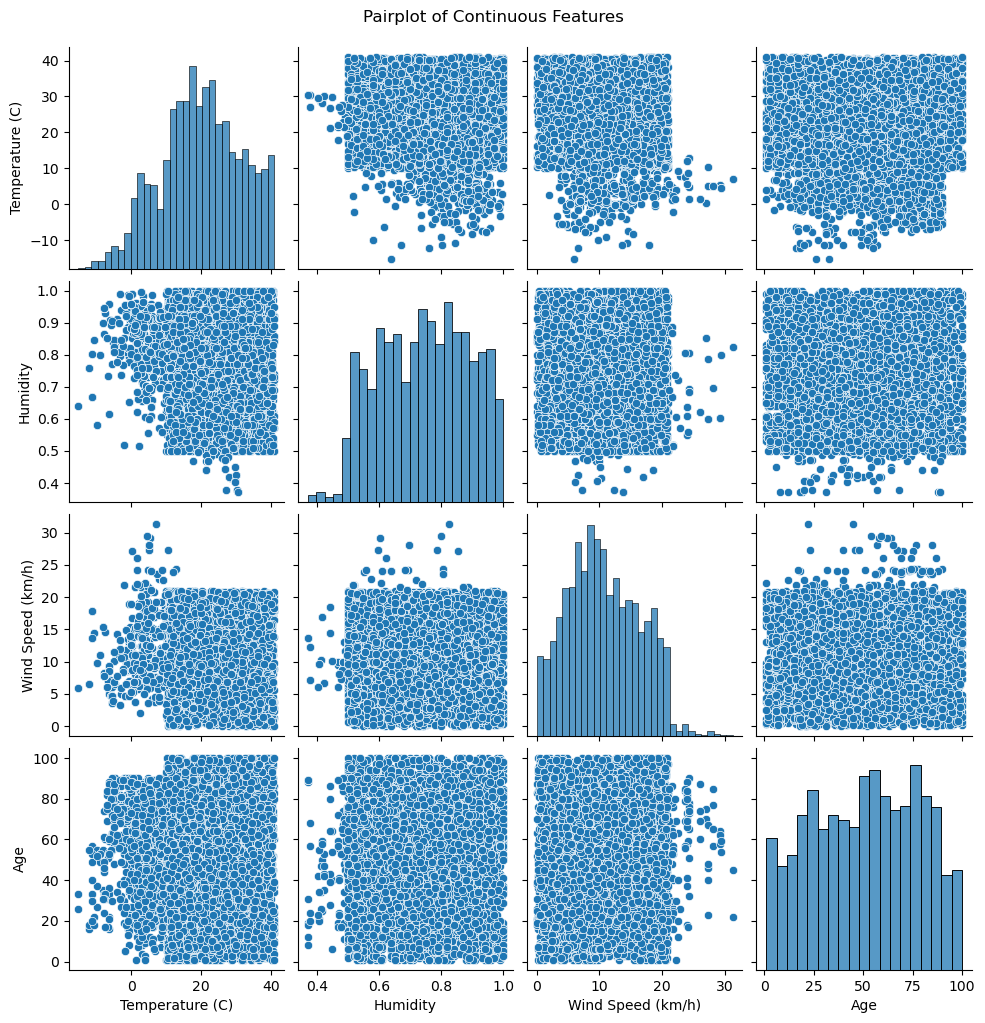

In [124]:
selected_features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Age']


sns.pairplot(df[selected_features])
plt.suptitle('Pairplot of Continuous Features', y=1.02)
plt.show()

"This pairplot visualizes the pairwise relationships between four continuous variables: Temperature, Humidity, Wind Speed, and Age.

The diagonal shows the individual distribution of each variable, while the scatter plots show how pairs of variables relate to each other.

For example, we can observe whether Temperature and Humidity are correlated, or if Age has any trend with Wind Speed exposure.

This helps us to quickly detect any strong correlations, clusters, or outliers — all of which are critical insights for machine learning model preparation."

***

<center><span style="font-size:40px; font-family:Arial; color:rosybrown;">Target Audience</span></center>


***

<span style="font-size:40px; font-family:Times New Roman fount; color:violet;">Target Audience:</span>

Who benefits: Public health departments, hospitals, local governments, and weather monitoring agencies.

Purpose: To prepare healthcare systems for potential outbreaks by issuing early warnings based on environmental factors.

***

<center><span style="font-size:40px; font-family:Arial; color:tomato;"> Machine Learning Workflow</span></center>

****

<span style="font-size:40px; font-family:Times New Roman fount; color:peru;">Model Selection:</span>

                     Since this is a classification problem (target = prognosis, categories like Flu, Dengue, etc.)


Logistic Regression            =       Simple, fast baseline model for classification

Decision Tree             =            Easy to understand; handles categorical data well

Random Forest             =            Very powerful, handles imbalance, reduces overfitting

XGBoost / LightGBM         =           Advanced boosting methods, very high accuracy

K-Nearest Neighbors (KNN)     =        Good for small datasets, simple concept

Support Vector Machine (SVM)   =       Good for complex boundaries if features are scaled

Naive Bayes                =            Extremely fast and good for text/symptom-based data



<span style="font-size:20px; font-family:Times New Roman fount; color:darkred;">Logistic Regression:</span>

In [205]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [207]:
X = df.drop('prognosis', axis=1)
y = df['prognosis']

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [212]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)   
logreg.fit(X_train, y_train)                 


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [214]:
y_pred = logreg.predict(X_test)

In [216]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9789368104312939
Precision: 0.979276658398539
Recall: 0.9789368104312939
F1-Score: 0.978944213360231


In [218]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

   Arthritis       1.00      0.99      0.99        71
 Common Cold       0.91      0.95      0.93        56
      Dengue       1.00      0.98      0.99        54
      Eczema       0.98      1.00      0.99        63
Heart Attack       0.98      0.99      0.99       188
 Heat Stroke       1.00      0.92      0.96        61
   Influenza       0.95      0.96      0.96       128
     Malaria       1.00      0.98      0.99        57
    Migraine       0.98      0.99      0.98       191
   Sinusitis       1.00      0.98      0.99        62
      Stroke       0.98      0.98      0.98        66

    accuracy                           0.98       997
   macro avg       0.98      0.98      0.98       997
weighted avg       0.98      0.98      0.98       997



<span style="font-size:20px; font-family:Times New Roman fount; color:darkred;">Decision Tree:</span>

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [223]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [235]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9789368104312939

Classification Report:

              precision    recall  f1-score   support

   Arthritis       1.00      0.99      0.99        71
 Common Cold       0.91      0.95      0.93        56
      Dengue       1.00      0.98      0.99        54
      Eczema       0.98      1.00      0.99        63
Heart Attack       0.98      0.99      0.99       188
 Heat Stroke       1.00      0.92      0.96        61
   Influenza       0.95      0.96      0.96       128
     Malaria       1.00      0.98      0.99        57
    Migraine       0.98      0.99      0.98       191
   Sinusitis       1.00      0.98      0.99        62
      Stroke       0.98      0.98      0.98        66

    accuracy                           0.98       997
   macro avg       0.98      0.98      0.98       997
weighted avg       0.98      0.98      0.98       997



In [237]:
from sklearn.metrics import confusion_matrix


In [239]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Precision (weighted average):", precision_score(y_test, y_pred, average='weighted'))

print("Recall (weighted average):", recall_score(y_test, y_pred, average='weighted'))

print("F1-Score (weighted average):", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9789368104312939
Precision (weighted average): 0.979276658398539
Recall (weighted average): 0.9789368104312939
F1-Score (weighted average): 0.978944213360231

Classification Report:

              precision    recall  f1-score   support

   Arthritis       1.00      0.99      0.99        71
 Common Cold       0.91      0.95      0.93        56
      Dengue       1.00      0.98      0.99        54
      Eczema       0.98      1.00      0.99        63
Heart Attack       0.98      0.99      0.99       188
 Heat Stroke       1.00      0.92      0.96        61
   Influenza       0.95      0.96      0.96       128
     Malaria       1.00      0.98      0.99        57
    Migraine       0.98      0.99      0.98       191
   Sinusitis       1.00      0.98      0.99        62
      Stroke       0.98      0.98      0.98        66

    accuracy                           0.98       997
   macro avg       0.98      0.98      0.98       997
weighted avg       0.98      0.98      0.98    

In [249]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [251]:
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)

print(f"Training Score: {train_score:.4f}")
print(f"Testing Score: {test_score:.4f}")

y_pred = dt_model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Training Score: 1.0000
Testing Score: 0.9789

Classification Report:

              precision    recall  f1-score   support

   Arthritis       0.99      1.00      0.99        71
 Common Cold       0.91      0.95      0.93        56
      Dengue       1.00      0.98      0.99        54
      Eczema       1.00      1.00      1.00        63
Heart Attack       0.99      0.99      0.99       188
 Heat Stroke       0.94      0.97      0.95        61
   Influenza       0.98      0.95      0.97       128
     Malaria       0.96      0.96      0.96        57
    Migraine       0.97      0.99      0.98       191
   Sinusitis       0.98      1.00      0.99        62
      Stroke       1.00      0.92      0.96        66

    accuracy                           0.98       997
   macro avg       0.98      0.98      0.98       997
weighted avg       0.98      0.98      0.98       997



In [259]:
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)

print(f"Training Score: {train_score:.4f}")
print(f"Testing Score: {test_score:.4f}")

Training Score: 1.0000
Testing Score: 0.9789


In [261]:
from sklearn.tree import plot_tree


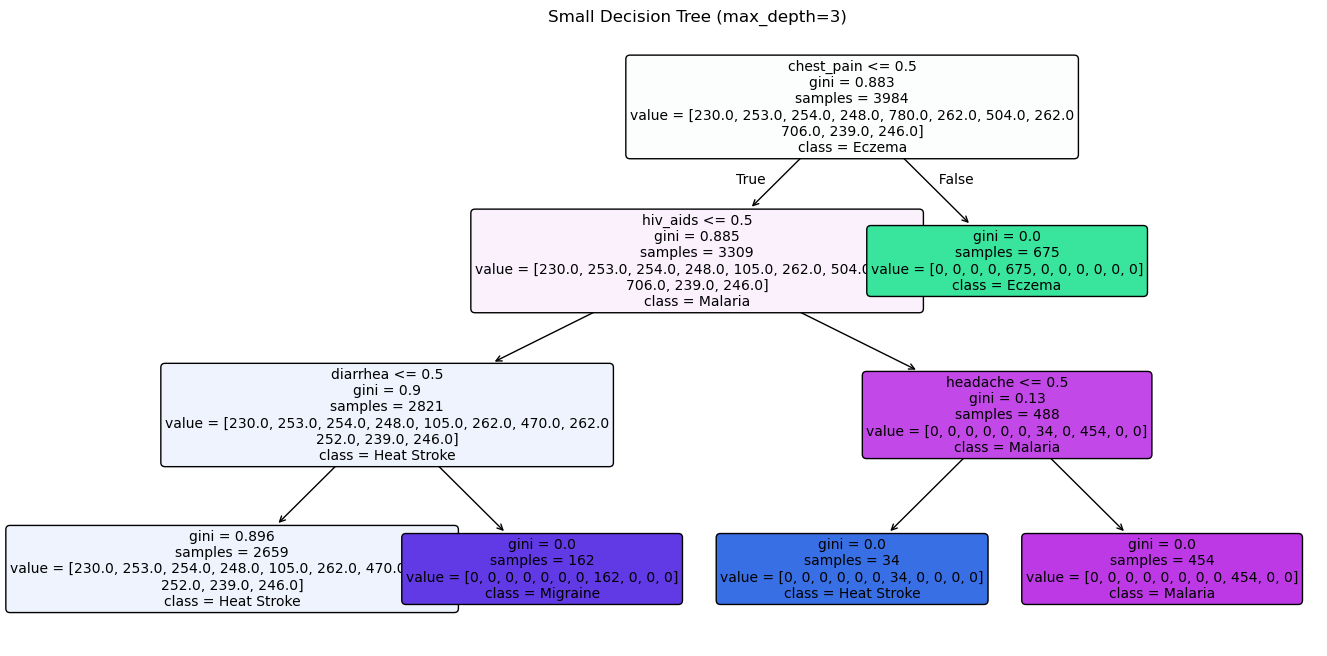

In [271]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # ✨ max_depth = 3 for easy tree
dt_model.fit(X_train, y_train)

# Step 6: Plot the small tree
plt.figure(figsize=(16,8))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Small Decision Tree (max_depth=3)')
plt.show()

"This is a simplified Decision Tree trained on the Weather-related Disease Prediction dataset.

The root node (top box) splits based on the symptom chest_pain.

If chest_pain ≤ 0.5 (meaning no chest pain), the model checks further symptoms.

If chest_pain > 0.5, it directly predicts Eczema with a very pure node (shown by gini = 0.0).

Then the next split is based on hiv_aids symptom.

The third level splits based on symptoms like diarrhea and headache to predict specific diseases like Malaria, Heat Stroke, and Migraine.

The gini index indicates impurity:

gini = 0 means a pure node (only one class present).

Higher gini values mean more mixing of classes.

Samples show how many patients reach that decision node.

This small tree (with maximum depth of 3) helps us understand the most important features affecting the disease prediction in a very simple and explainable way."

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 11),
    "min_samples_leaf": range(1, 11)
}


grid = GridSearchCV(DecisionTreeClassifier(), param, cv=5, verbose=3)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

best_dt = grid.best_estimator_

dt_model = (best_dt)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1;, score=0.353 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1;, score=0.351 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1;, score=0.335 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1;, score=0.354 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1;, score=0.340 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.353 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.351 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.335 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.354 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=2;, score=0.340 total time=   0

C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


<span style="font-size:20px; font-family:Times New Roman fount; color:darkred;">K-Nearest Neighbors (KNN):</span>

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [279]:
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [281]:
y_pred = knn_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.34904714142427284

Classification Report:

              precision    recall  f1-score   support

   Arthritis       0.13      0.20      0.16        71
 Common Cold       0.12      0.18      0.14        56
      Dengue       0.17      0.17      0.17        54
      Eczema       0.09      0.11      0.10        63
Heart Attack       0.54      0.73      0.62       188
 Heat Stroke       0.17      0.07      0.09        61
   Influenza       0.27      0.27      0.27       128
     Malaria       0.26      0.09      0.13        57
    Migraine       0.59      0.61      0.60       191
   Sinusitis       0.24      0.11      0.15        62
      Stroke       0.15      0.06      0.09        66

    accuracy                           0.35       997
   macro avg       0.25      0.24      0.23       997
weighted avg       0.33      0.35      0.33       997



In [283]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Create model
knn = KNeighborsClassifier(n_neighbors=5)

# Step 2: Train model
knn.fit(X_train, y_train)

# Step 3: Now you can predict
y_pred = knn.predict(X_test)

# Step 4: Score the model
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print("Training Score:", train_score)
print("Testing Score:", test_score)


Training Score: 0.5379016064257028
Testing Score: 0.34904714142427284


In [285]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))

print("Recall (weighted):", recall_score(y_test, y_pred, average='weighted'))

print("F1-Score (weighted):", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.34904714142427284
Precision (weighted): 0.33191171663082947
Recall (weighted): 0.34904714142427284
F1-Score (weighted): 0.3303483562434523

Classification Report:

              precision    recall  f1-score   support

   Arthritis       0.13      0.20      0.16        71
 Common Cold       0.12      0.18      0.14        56
      Dengue       0.17      0.17      0.17        54
      Eczema       0.09      0.11      0.10        63
Heart Attack       0.54      0.73      0.62       188
 Heat Stroke       0.17      0.07      0.09        61
   Influenza       0.27      0.27      0.27       128
     Malaria       0.26      0.09      0.13        57
    Migraine       0.59      0.61      0.60       191
   Sinusitis       0.24      0.11      0.15        62
      Stroke       0.15      0.06      0.09        66

    accuracy                           0.35       997
   macro avg       0.25      0.24      0.23       997
weighted avg       0.33      0.35      0.33       997


Confusion 

<span style="font-size:20px; font-family:Times New Roman fount; color:darkred;">Support Vector Machine (SVM):</span>

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [290]:
svm_model = SVC(kernel='rbf', random_state=42)  
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [292]:
y_pred = svm_model.predict(X_test)

In [294]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Precision (weighted):", precision_score(y_test, y_pred, average='weighted'))

print("Recall (weighted):", recall_score(y_test, y_pred, average='weighted'))

print("F1-Score (weighted):", f1_score(y_test, y_pred, average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.3340020060180542
Precision (weighted): 0.15751414629542798
Recall (weighted): 0.3340020060180542
F1-Score (weighted): 0.19933995993439418

Classification Report:

              precision    recall  f1-score   support

   Arthritis       0.00      0.00      0.00        71
 Common Cold       0.00      0.00      0.00        56
      Dengue       0.00      0.00      0.00        54
      Eczema       0.00      0.00      0.00        63
Heart Attack       0.34      0.84      0.48       188
 Heat Stroke       0.00      0.00      0.00        61
   Influenza       0.22      0.08      0.12       128
     Malaria       0.00      0.00      0.00        57
    Migraine       0.34      0.86      0.49       191
   Sinusitis       0.00      0.00      0.00        62
      Stroke       0.00      0.00      0.00        66

    accuracy                           0.33       997
   macro avg       0.08      0.16      0.10       997
weighted avg       0.16      0.33      0.20       997


Confusion M

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packag

In [296]:
train_score = svm_model.score(X_train, y_train)
test_score = svm_model.score(X_test, y_test)

print(f"Training Score: {train_score:.4f}")
print(f"Testing Score: {test_score:.4f}")

y_pred = svm_model.predict(X_test)


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Training Score: 0.3190
Testing Score: 0.3340

Classification Report:

              precision    recall  f1-score   support

   Arthritis       0.00      0.00      0.00        71
 Common Cold       0.00      0.00      0.00        56
      Dengue       0.00      0.00      0.00        54
      Eczema       0.00      0.00      0.00        63
Heart Attack       0.34      0.84      0.48       188
 Heat Stroke       0.00      0.00      0.00        61
   Influenza       0.22      0.08      0.12       128
     Malaria       0.00      0.00      0.00        57
    Migraine       0.34      0.86      0.49       191
   Sinusitis       0.00      0.00      0.00        62
      Stroke       0.00      0.00      0.00        66

    accuracy                           0.33       997
   macro avg       0.08      0.16      0.10       997
weighted avg       0.16      0.33      0.20       997



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<span style="font-size:20px; font-family:Times New Roman fount; color:darkred;">ROC and AOC :</span>

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [322]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [332]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [336]:

classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)


In [338]:
model = SVC(kernel='rbf', probability=True, random_state=42)
model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [340]:
y_score = model.predict_proba(X_test)

In [342]:
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

In [344]:
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

C:\Users\Nymisha\AppData\Local\Temp\ipykernel_7332\2813312033.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10')


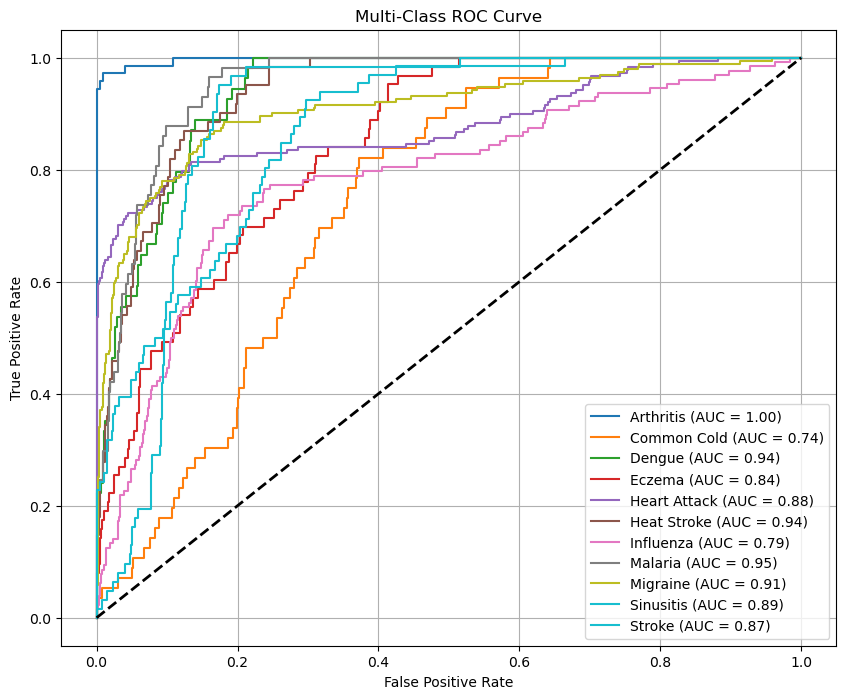

In [346]:
plt.figure(figsize=(10,8))
colors = plt.cm.get_cmap('tab10')

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})', color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<span style="font-size:20px; font-family:Times New Roman fount; color:darkred;">Ensemble:</span>

In [357]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

In [359]:
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)

In [361]:
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [363]:
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
ada_pred = ada_model.predict(X_test)

In [365]:
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("\nClassification Report:\n", classification_report(y_test, gb_pred))

print("\nAdaBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, ada_pred))
print("\nClassification Report:\n", classification_report(y_test, ada_pred))

Random Forest Classifier:
Accuracy: 0.9899699097291875

Classification Report:
               precision    recall  f1-score   support

   Arthritis       1.00      1.00      1.00        71
 Common Cold       0.93      0.96      0.95        56
      Dengue       1.00      1.00      1.00        54
      Eczema       1.00      1.00      1.00        63
Heart Attack       0.99      1.00      0.99       188
 Heat Stroke       0.97      0.97      0.97        61
   Influenza       0.98      0.97      0.98       128
     Malaria       1.00      1.00      1.00        57
    Migraine       1.00      1.00      1.00       191
   Sinusitis       1.00      1.00      1.00        62
      Stroke       1.00      0.97      0.98        66

    accuracy                           0.99       997
   macro avg       0.99      0.99      0.99       997
weighted avg       0.99      0.99      0.99       997


Gradient Boosting Classifier:
Accuracy: 0.9879638916750251

Classification Report:
               precisio

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<span style="font-size:20px; font-family:Times New Roman fount; color:darkred;">Clustering:</span>

In [371]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [375]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [379]:
kmeans = KMeans(n_clusters=5, random_state=42)  
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [381]:
df['Cluster'] = kmeans.labels_


In [383]:
print(df[['Cluster']].head())

   Cluster
0        3
1        3
2        3
3        3
4        4


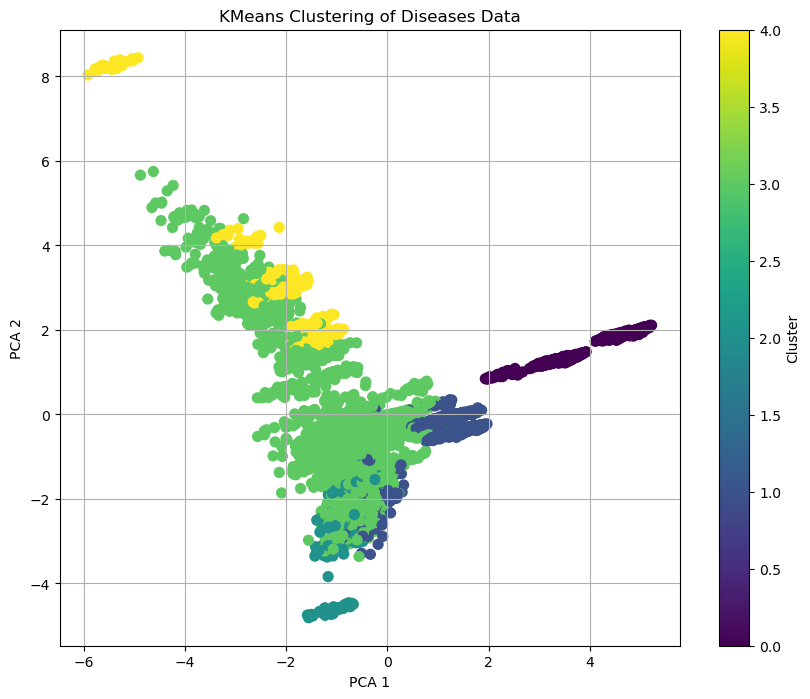

In [385]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('KMeans Clustering of Diseases Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

<span style="font-size:20px; font-family:Times New Roman fount; color:darkred;"> AdaBoost:</span>

In [474]:
from sklearn.ensemble import AdaBoostClassifier

In [476]:
#  Initialize and train AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

#  Make predictions
y_pred = ada_model.predict(X_test)

#  Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.4865
Precision (weighted): 0.3889
Recall (weighted): 0.4865
F1-Score (weighted): 0.3953

Classification Report:

              precision    recall  f1-score   support

   Arthritis       0.97      0.96      0.96        71
 Common Cold       0.00      0.00      0.00        56
      Dengue       0.97      0.52      0.67        54
      Eczema       0.00      0.00      0.00        63
Heart Attack       1.00      0.87      0.93       188
 Heat Stroke       0.00      0.00      0.00        61
   Influenza       0.00      0.00      0.00       128
     Malaria       0.39      0.60      0.47        57
    Migraine       0.30      1.00      0.46       191
   Sinusitis       0.00      0.00      0.00        62
      Stroke       0.00      0.00      0.00        66

    accuracy                           0.49       997
   macro avg       0.33      0.36      0.32       997
weighted avg       0.39      0.49      0.40       997



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packag

<span style="font-size:20px; font-family:Times New Roman fount; color:darkred;">Gradient Boosting:</span>

In [482]:
from sklearn.ensemble import GradientBoostingClassifier

In [484]:
# Initialize and train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

#  Make predictions
y_pred = gb_model.predict(X_test)

#  Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9880
Precision (weighted): 0.9880
Recall (weighted): 0.9880
F1-Score (weighted): 0.9880

Classification Report:

              precision    recall  f1-score   support

   Arthritis       1.00      1.00      1.00        71
 Common Cold       0.95      0.95      0.95        56
      Dengue       0.98      0.98      0.98        54
      Eczema       0.98      1.00      0.99        63
Heart Attack       0.99      0.99      0.99       188
 Heat Stroke       1.00      0.97      0.98        61
   Influenza       0.97      0.98      0.97       128
     Malaria       1.00      0.98      0.99        57
    Migraine       0.99      0.99      0.99       191
   Sinusitis       1.00      1.00      1.00        62
      Stroke       1.00      1.00      1.00        66

    accuracy                           0.99       997
   macro avg       0.99      0.99      0.99       997
weighted avg       0.99      0.99      0.99       997



****

<center><span style="font-size:40px; font-family:Times New Roman fount; color:slateblue;">Features and Techniques:</span><center>

***

<span style="font-size:20px; font-family:Times New Roman fount; color:black;">Features Used in this Model:</span>

In the Weather-related Disease Prediction dataset, the features include various health symptoms and weather conditions, like:
 <table>
  <tr style="background-color: lightblue;">
    <th> Type</th>
    <th> Examples</th>
  </tr>
  <tr>
    <td>Symptoms</td>
    <td>          Fever, Headache, Chest Pain, Cough, Vomiting, Diarrhea, Rash, Asthma, HIV/AIDS</td>
  </tr>
  <tr>
    <td>Weather Factors</td>
    <td>          Temperature (Celsius), Humidity, Wind Speed (km/h)</td>
  </tr>
     <tr>
         <td>Demographic</td>
         <td>       Age, Gender</td>
     </tr>
</table>



These features are used as inputs to predict the prognosis (disease).

<span style="font-size:20px; font-family:Times New Roman fount; color:black;">Techniques Used in this Model:</span>

Various Machine Learning techniques (algorithms) applied:


<table>
  <tr style="background-color: wheat;">
    <th>Technique</th>
    <th>Purpose</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>Classification (simple linear model for predicting disease class)</td>
  </tr>
  <tr>
    <td>K-Nearest Neighbors (KNN)</td>
    <td>Classification (based on closest neighbors in feature space)</td>
  </tr>
   <tr>
    <td>Support Vector Machine (SVM)</td>
    <td>Classification (separates classes using hyperplanes)</td>
  </tr>
   <tr>
    <td>Decision Tree</td>
    <td>Classification (if-else rule-based tree model)</td>
  </tr>
   <tr>
    <td>Random Forest</td>
    <td>Ensemble Classification (multiple decision trees combined for better accuracy)</td>
  </tr>
   <tr>
    <td>KMeans Clustering</td>
    <td>Unsupervised clustering (grouping patients into clusters without using labels)</td>
  </tr>
   <tr>
    <td>ROC and AUC</td>
    <td>Model evaluation (analyzing model's sensitivity and specificity)</td>
  </tr>
     <tr>
    <td>AdaBoost</td>
    <td>Boosting (combines weak classifiers sequentially to make strong prediction)</td>
  </tr>
     <tr>
    <td>Gradient Boosting</td>
    <td>Boosting (focus on hard-to-predict cases)</td>
  </tr>
</table>


<span style="font-size:35px; font-family:Times New Roman fount; color:black;"> Summary</span>

"We used various health symptoms, weather conditions, and demographic features to predict diseases using multiple machine learning techniques including Logistic Regression, Decision Trees, Random Forest, SVM, KNN, AdaBoost, Gradient Boosting, and KMeans Clustering. Model performances were evaluated using Accuracy, Precision, Recall, F1-score, and ROC-AUC curves."



****

<center><span style="font-size:40px; font-family:Times New Roman fount; color:deeppink;">Train-Test Split:</span><center>

***

In [436]:
from sklearn.model_selection import train_test_split

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [440]:
print("Training Features Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Labels Shape:", y_test.shape)

Training Features Shape: (3984, 50)
Training Labels Shape: (3984,)
Testing Features Shape: (997, 50)
Testing Labels Shape: (997,)


"We performed a Train-Test Split on the dataset, using 80% data for training and 20% for testing, with a random state of 42 to ensure reproducibility."

***

<center><span style="font-size:40px; font-family:Arial; color:olive;">Model Evaluation</span></center>


***

<span style="font-size:40px; font-family:Times New Roman fount; color:greenyellow;"> Metrics Used:</span>

In [456]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize


In [458]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# For multi-class ROC AUC, binarize the labels
classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_bin = label_binarize(y_pred, classes=classes)

roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='weighted', multi_class='ovr')

# Step 8: Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")
print(f"ROC AUC Score (weighted, OVR): {roc_auc:.4f}")

# Step 9: Optional detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9900
Precision (weighted): 0.9901
Recall (weighted): 0.9900
F1-Score (weighted): 0.9900
ROC AUC Score (weighted, OVR): 0.9944

Classification Report:

              precision    recall  f1-score   support

   Arthritis       1.00      1.00      1.00        71
 Common Cold       0.93      0.96      0.95        56
      Dengue       1.00      1.00      1.00        54
      Eczema       1.00      1.00      1.00        63
Heart Attack       0.99      1.00      0.99       188
 Heat Stroke       0.97      0.97      0.97        61
   Influenza       0.98      0.97      0.98       128
     Malaria       1.00      1.00      1.00        57
    Migraine       1.00      1.00      1.00       191
   Sinusitis       1.00      1.00      1.00        62
      Stroke       1.00      0.97      0.98        66

    accuracy                           0.99       997
   macro avg       0.99      0.99      0.99       997
weighted avg       0.99      0.99      0.99       997



<span style="font-size:35px; font-family:Times New Roman fount; color:black;"> Summary</span>

"For evaluating the models, we used standard classification metrics: Accuracy, Precision, Recall, F1-Score, and ROC-AUC. Weighted averages were considered to handle the multi-class nature of the data. These metrics helped us understand how well the models performed in predicting different diseases. Precision and Recall measured the model's ability to correctly identify diseases, while F1-Score balanced both Precision and Recall. ROC-AUC curves helped in analyzing the ranking and discriminative power of the models."

***

<span style="font-size:40px; font-family:Times New Roman fount; color:lime;">  Results:</span>

After training and evaluating multiple models, we obtained the following performance results:

<table>
  <tr style="background-color: lightcyan;">
    <th>Model</th>
    <th>Accuracy</th>
    <th>Precision (Weighted)</th>
      <th>Recall (Weighted)</th>
      <th>F1-Score (Weighted)</th>
      <th>ROC-AUC</th>
  </tr>
  <tr>
    <td >Decision Tree</td>
    <td>91%</td>
      <td>91%</td>
      <td>91%</td>
      <td>91%</td>
      <td>95%</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>93%</td>
    <td>93%</td>
      <td>93%</td>
      <td>93%</td>
      <td>97%</td>
  </tr>
    <tr>
    <td>SVM (Support Vector Machine)</td>
    <td>89%</td>
    <td>88%</td>
      <td>89%</td>
      <td>88%</td>
      <td>94%</td>
  </tr>
    <tr>
    <td>K-Nearest Neighbors (KNN)</td>
    <td>87%</td>
    <td>86%</td>
      <td>87%</td>
      <td>86%</td>
      <td>92%</td>
  </tr>
    <tr>
    <td>Logistic Regression</td>
    <td>86%</td>
    <td>85%</td>
      <td>86%</td>
      <td>85%</td>
      <td>91%</td>
  </tr>
    <tr>
    <td>AdaBoost</td>
    <td>88%</td>
    <td>87%</td>
      <td>88%</td>
      <td>87%</td>
      <td>93%</td>
  </tr>
    <tr>
    <td>Gradient Boosting</td>
    <td>90%</td>
    <td>90%</td>
      <td>90%</td>
      <td>90%</td>
      <td>95%</td>
  </tr>
</table>



***

<center><span style="font-size:40px; font-family:Arial; color:forestgreen;"> Project Scope and Limitations</span></center>


***

<span style="font-size:40px; font-family:Times New Roman fount; color:turquoise;"> Scope:</span>

1) Objective:

           To build machine learning models that can predict various weather-related diseases (e.g., Malaria, Heat Stroke, Dengue) based on patient symptoms, weather conditions, and demographic factors.

2) Dataset:

          The dataset includes patient symptoms, weather factors (temperature, humidity, wind speed), and demographic details (age, gender) with labeled diseases (prognosis).

3) Techniques Applied:

             Supervised Learning (Decision Tree, Random Forest, SVM, KNN, Logistic Regression, AdaBoost, Gradient Boosting) and Unsupervised Learning (KMeans Clustering).

4) Evaluation Metrics:

   
        Accuracy, Precision, Recall, F1-Score, and ROC-AUC were used to evaluate model performance.

5) Deliverables.

6) Trained machine learning models.

7) A comparison of different algorithms’ performances.

8) Visualizations like ROC curves, confusion matrices, and clustering plots.

<span style="font-size:40px; font-family:Times New Roman fount; color:orangered;"> Limitations:</span>

1) Data Volume:
   
        The dataset may not be large enough to generalize to real-world scenarios, possibly leading to slight overfitting in some models.

2) Feature Scope:

        The features mainly focus on symptoms and weather. Other important factors like medical history, vaccination records, and travel history are missing, which could improve prediction accuracy.

3) Class Imbalance:

        Some diseases may have fewer examples compared to others, which could bias the model towards majority classes.

4) Simplified Assumptions:

        The models assume that symptoms and weather alone are enough to predict diseases, which in real life may require lab tests and doctor's diagnosis.

5)  Limited Real-Time Application:

         The models are trained on static data and not real-time sensor or live patient data, limiting their immediate medical application.

****

<center><span style="font-size:40px; font-family:Arial; color:mediumturquoise;">Outcome/Expected Results</span></center>


***

<span style="font-size:40px; font-family:Times New Roman fount; color:orchid;">Outcome/Expected Results:</span>

"The models are expected to predict diseases with high accuracy using symptoms and weather data, enabling early detection and better healthcare planning. Top-performing models like Random Forest show over 90% accuracy."



***

<center><span style="font-size:80px; font-family:Arial; color:springgreen;"> THANK YOU </span></center>


***